# Projeto #3 - Meu primeiro projeto de IA

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/blob/master/projeto_3/README.md).


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela (podem ser mais de uma)? Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).

Estou trabalhando com uma base composta pelas características dos jogos High Elo(Challenger, GrandMaster, Master) do jogo League Of Legends no intuito de tentar entender quais são as características que mais influenciam a taxa de vitória e consequentemente saber quais devem ser os focos no jogo para poder aumentar a taxa de vitória e subir de elo.

Link da base: https://www.kaggle.com/gyejr95/league-of-legends-challenger-ranked-games2020

### 2) **(5%)** Que tipo de problema podemos solucionar com ela? Liste ao menos 3 hipóteses sobre seus dados, caso sua base seja muito restrita converse com os professores antes de seguir.

O foco deste trabalho é descobrir quais são as características que mais influenciam na vitória.

Hipóteses:

- A quantidade de abates do time é o maior garantidor de vitorias?
- As mortes do time são o maior causador de derrotas?
- Qual a influência dos objetivos (Dragon, Baron, Inhibitor e Turret) na taxa de vitória? Seriam eles mais importantes que abates e mortes? 
- O que é mais importante como foco? Objetivos ou ouro?
- Quais devem ser os maiores focos do jogar durante o jogo?

### 3) **(20%)** Preparação de dados

Hora de deixar a base perfeita para se trabalhar. Limpe os dados, integre com outras fontes e transforme-o para ficar pronto para se trabalhar! No fim, mostre um antes e depois de seu dataframe.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import tree
from sklearn.model_selection import cross_val_score

In [114]:
df1 = pd.read_table(r'C:\Users\braga\Google Drive\Trabalho3\Base\Challenger_Ranked_Games.csv',sep=',')
df2 = pd.read_table(r'C:\Users\braga\Google Drive\Trabalho3\Base\GrandMaster_Ranked_Games.csv',sep=',')
df3 = pd.read_table(r'C:\Users\braga\Google Drive\Trabalho3\Base\Master_Ranked_Games.csv',sep=',')
frames = [df1, df2, df3]
df_raw = pd.concat(frames)

In [115]:
df_raw

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [116]:
df_raw.count()

gameId                     199925
gameDuraton                199925
blueWins                   199925
blueFirstBlood             199925
blueFirstTower             199925
blueFirstBaron             199925
blueFirstDragon            199925
blueFirstInhibitor         199925
blueDragonKills            199925
blueBaronKills             199925
blueTowerKills             199925
blueInhibitorKills         199925
blueWardPlaced             199925
blueWardkills              199925
blueKills                  199925
blueDeath                  199925
blueAssist                 199925
blueChampionDamageDealt    199925
blueTotalGold              199925
blueTotalMinionKills       199925
blueTotalLevel             199925
blueAvgLevel               199925
blueJungleMinionKills      199925
blueKillingSpree           199925
blueTotalHeal              199925
blueObjectDamageDealt      199925
redWins                    199925
redFirstBlood              199925
redFirstTower              199925
redFirstBaron 

In [117]:
df_raw.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [118]:
min_time = round((df_raw["gameDuraton"].min())/60,0)
max_time = round((df_raw["gameDuraton"].max())/60,0)
print("Menor jogo: ", min_time, "minutos")
print("Maior jogo: ", max_time, "minutos")

Menor jogo:  2.0 minutos
Maior jogo:  63.0 minutos


In [119]:
df = df_raw[df_raw["gameDuraton"]>= (60*14)]

#Jogos com menos de 15 minutos (tabela está em segundos) são inválidos para análise pois,
#são jogos nos quais ou um dos jogadores de algum time não conectou e o time preferiu desistir da
#partida ou por algum motivo o jogo foi invalidado devido a algum erros por parte da RIOT.

#Jogos de 63 minutos são raros mas possíveis.

#RIOT é a administradora e mantenedora do servidor do jogo.

In [120]:
df = df.drop(["gameId","gameDuraton"], axis = 1)
#gameId e gameDuraton não são mais relevantes para a análise.

In [121]:
df

,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,0,1,0,0,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,1,0,0,0,1,0,2,0,4,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,0,0,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,0,0,0,1,1,0,1,1,2,0,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,1,1,1,1,1,1,2,2,11,3,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,1,1,0,0,0,0,3,1,7,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,0,0,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,0,1,1,0,0,0,1,0,6,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,0,0,0,0,0,0,1,0,2,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [122]:
print(df["redWins"].value_counts())
print(df["blueWins"].value_counts())

1    95199
0    93319
Name: redWins, dtype: int64
0    95199
1    93319
Name: blueWins, dtype: int64


In [123]:
blue_wins = df["blueWins"][df["blueWins"]==1].sum()
red_wins = df["redWins"][df["redWins"]==1].sum()
tot_wins = blue_wins+red_wins
blue_percent_tot_wins = (blue_wins/tot_wins)*100
red_percent_tot_wins = (red_wins/tot_wins)*100
print("Blue vence",blue_percent_tot_wins,"% das partidas.")
print("Red vence",red_percent_tot_wins,"% das partidas.")

Blue vence 49.5013738741 % das partidas.
Red vence 50.4986261259 % das partidas.


In [124]:
df_red = df.filter(like="red")
df_blue = df.filter(like="blue")

#O df será dividido em 2: red e blue e depois serão reagrupados em um único df contendo 24 colunas
#pois, os mesmos tipos de dados estão sendo repetidos duas vezes ao longo das colunas tendo como
#diferença apenas a lado do mapa ocupado pelo time.

#Como a quantidade de vitorias e derrotas está perfeitamente espelhada entre blueWins e redWins
#e não há dados nulos ao longo do df é possível fazer esta operação sem perder a integridade dos dados.

#A variação de vitória entre um lado e o outro não chega a 0,5% e pelo fato dos lados do mapa serem
#espelhados, no qual o lado direito de um é igual ao lado esquerdo do outro, e a quantidades de
#recursos e objetivos serem iguais para ambos os lados esta variação é proveniente das demais features
#existentes no df.

#Fazendo o rearranjo desta forma fica melhor também a possibilidade de análise de quais features levam
#a vitória ou a derrota, pelo fato de com o rearranjo cada uma representara metade exata do dado.

In [125]:
print(df_red.columns)
df_red

Index(['redWins', 'redFirstBlood', 'redFirstTower', 'redFirstBaron',
       'redFirstDragon', 'redFirstInhibitor', 'redDragonKills',
       'redBaronKills', 'redTowerKills', 'redInhibitorKills', 'redWardPlaced',
       'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
      dtype='object')


,redWins,redFirstBlood,redFirstTower,redFirstBaron,redFirstDragon,redFirstInhibitor,redDragonKills,redBaronKills,redTowerKills,redInhibitorKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,1,0,1,0,1,1,3,0,9,1,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,0,1,1,0,0,0,0,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,1,1,1,0,1,1,2,0,5,1,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,1,1,1,0,0,0,3,1,6,0,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,0,0,0,0,0,0,3,1,6,1,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,0,0,1,1,1,1,3,1,6,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,1,1,1,0,1,0,2,0,3,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,1,0,0,1,1,1,4,2,9,3,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,1,1,1,1,1,1,2,1,7,1,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [126]:
print(df_blue.columns)
df_blue

Index(['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron',
       'blueFirstDragon', 'blueFirstInhibitor', 'blueDragonKills',
       'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills',
       'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath',
       'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt'],
      dtype='object')


,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,blueTowerKills,blueInhibitorKills,...,blueAssist,blueChampionDamageDealt,blueTotalGold,blueTotalMinionKills,blueTotalLevel,blueAvgLevel,blueJungleMinionKills,blueKillingSpree,blueTotalHeal,blueObjectDamageDealt
0,0,1,0,0,0,0,0,0,0,0,...,22,56039,37001,440,56,11.2,105,4,31035,5675
1,1,0,0,0,1,0,2,0,4,0,...,31,60243,41072,531,63,12.6,111,3,26397,45303
2,0,0,0,0,0,0,0,0,0,0,...,8,24014,22929,306,42,8.4,64,0,6567,5651
3,0,0,0,1,1,0,1,1,2,0,...,45,101607,63447,774,80,16.0,226,3,24718,31019
4,1,1,1,1,1,1,2,2,11,3,...,47,134826,74955,831,83,16.6,252,5,37161,95287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,1,1,0,0,0,0,3,1,7,1,...,83,142725,82466,803,89,17.8,251,13,67496,98972
107121,0,0,0,0,0,0,0,0,0,0,...,4,26093,23058,328,45,9.0,79,1,13559,4206
107122,0,1,1,0,0,0,1,0,6,0,...,36,80643,65433,764,78,15.6,206,7,30752,48581
107123,0,0,0,0,0,0,1,0,2,0,...,35,80053,44680,504,60,12.0,99,4,16526,19205


In [127]:
colunas = df_blue.columns

In [128]:
colunas

Index(['blueWins', 'blueFirstBlood', 'blueFirstTower', 'blueFirstBaron',
       'blueFirstDragon', 'blueFirstInhibitor', 'blueDragonKills',
       'blueBaronKills', 'blueTowerKills', 'blueInhibitorKills',
       'blueWardPlaced', 'blueWardkills', 'blueKills', 'blueDeath',
       'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt'],
      dtype='object')

In [129]:
colunas = colunas.map(lambda x: x.lstrip('blue').rstrip(''))

In [130]:
colunas

Index(['Wins', 'FirstBlood', 'FirstTower', 'FirstBaron', 'FirstDragon',
       'FirstInhibitor', 'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills', 'Death', 'Assist',
       'ChampionDamageDealt', 'TotalGold', 'TotalMinionKills', 'TotalLevel',
       'AvgLevel', 'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt'],
      dtype='object')

In [131]:
df_red.columns = colunas
df_blue.columns = colunas
print(df_blue.columns)
print(df_red.columns)

Index(['Wins', 'FirstBlood', 'FirstTower', 'FirstBaron', 'FirstDragon',
       'FirstInhibitor', 'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills', 'Death', 'Assist',
       'ChampionDamageDealt', 'TotalGold', 'TotalMinionKills', 'TotalLevel',
       'AvgLevel', 'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt'],
      dtype='object')
Index(['Wins', 'FirstBlood', 'FirstTower', 'FirstBaron', 'FirstDragon',
       'FirstInhibitor', 'DragonKills', 'BaronKills', 'TowerKills',
       'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills', 'Death', 'Assist',
       'ChampionDamageDealt', 'TotalGold', 'TotalMinionKills', 'TotalLevel',
       'AvgLevel', 'JungleMinionKills', 'KillingSpree', 'TotalHeal',
       'ObjectDamageDealt'],
      dtype='object')


In [132]:
frames2 = [df_red, df_blue]
df = pd.concat(frames2)
df = df.sample(frac=1).reset_index(drop=True)

In [133]:
df_raw

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107120,4216107910,2479,1,1,0,0,0,0,3,1,...,41,149798,72167,789,86,17.2,258,6,34890,62124
107121,4031558534,932,0,0,0,0,0,0,0,0,...,26,37534,32931,364,51,10.2,110,5,11983,31400
107122,3882136458,2081,0,1,1,0,0,0,1,0,...,68,97369,71576,797,85,17.0,222,8,33499,79612
107123,4137464714,1619,0,0,0,0,0,0,1,0,...,68,116262,59001,524,72,14.4,162,11,52292,60903


In [134]:
df

,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,...,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,1,0,0,1,1,1,2,1,7,1,...,45,67290,49014,481,70,14.0,129,6,27440,51473
1,1,1,1,1,0,1,2,2,9,1,...,54,122689,73057,687,86,17.2,231,12,43476,82289
2,1,1,1,0,0,0,1,0,5,0,...,14,41757,37613,519,58,11.6,118,5,18453,34399
3,0,0,1,0,0,0,1,0,3,0,...,34,63149,49753,603,65,13.0,187,4,23766,49898
4,1,1,1,0,0,0,0,0,4,1,...,95,108220,63415,250,87,17.4,0,12,46176,9622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377031,1,1,1,0,0,1,2,0,11,3,...,89,121022,67989,692,78,15.6,193,12,27313,60322
377032,1,1,1,0,1,0,1,0,2,0,...,25,34633,32363,389,50,10.0,94,3,16164,22610
377033,1,1,1,0,1,1,2,0,10,1,...,23,30516,37148,432,53,10.6,115,2,8497,42128
377034,1,1,1,1,1,1,3,1,11,3,...,58,98734,56487,564,69,13.8,158,9,21685,72801


### 4) **(30%)** Análise

Com seu dado pronto, é hora de fazer a parte mais legal: investigar e responder nossas hipoteses. Elas se confirmam? Em quais cenários? Existe alguma forma de perceber isso no mundo real? Dica: Abuse das técnicas de visualização.

Ex: Ainda no contexto dos exemplos do item 2). Ao investigar a hipotese relacionada ao padrão de compra, percebi que em todos os meses existia uma diferença entre dia util e final de semana. Porém notei que Fevereiro possui um comportamento diferente, o que poderia explicar? Talvez o carnaval e seus feriados.

Ex2: Talvez eu descubra que alguns finais de semana possuam um comportamento diferente dos dias de semana e outros não. Por que não são todos? Nessa investigação você pode acabar descobrindo que os finais de semana que são diferentes, coincidem no fato de serem os primeiros dias utéis, o que pode remeter ao fato de boa parte das empresas realizarem pagamentos nessa parte do mês.

In [135]:
df_win = df[df["Wins"]==1].reset_index(drop=True)
df_lose = df[df["Wins"]==0].reset_index(drop=True)

In [136]:
df_win

,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,...,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,1,0,0,1,1,1,2,1,7,1,...,45,67290,49014,481,70,14.0,129,6,27440,51473
1,1,1,1,1,0,1,2,2,9,1,...,54,122689,73057,687,86,17.2,231,12,43476,82289
2,1,1,1,0,0,0,1,0,5,0,...,14,41757,37613,519,58,11.6,118,5,18453,34399
3,1,1,1,0,0,0,0,0,4,1,...,95,108220,63415,250,87,17.4,0,12,46176,9622
4,1,0,1,1,1,0,1,1,7,1,...,119,275817,111033,417,107,21.4,64,21,63178,52947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188513,1,1,1,0,1,1,4,0,8,2,...,40,86258,53622,542,70,14.0,157,7,35545,63883
188514,1,1,1,0,0,1,2,0,11,3,...,89,121022,67989,692,78,15.6,193,12,27313,60322
188515,1,1,1,0,1,0,1,0,2,0,...,25,34633,32363,389,50,10.0,94,3,16164,22610
188516,1,1,1,0,1,1,2,0,10,1,...,23,30516,37148,432,53,10.6,115,2,8497,42128


In [137]:
df_lose

,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,...,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,0,0,1,0,0,0,1,0,3,0,...,34,63149,49753,603,65,13.0,187,4,23766,49898
1,0,0,0,1,0,1,2,3,8,1,...,49,126760,77007,938,85,17.0,201,5,56358,86067
2,0,0,0,0,0,0,1,0,3,0,...,14,52309,43567,654,64,12.8,168,2,18890,27628
3,0,0,0,0,1,0,2,0,1,0,...,36,82634,51256,604,70,14.0,157,7,26566,33740
4,0,0,0,0,0,0,0,0,1,0,...,13,33253,30763,360,49,9.8,68,1,11185,5764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188513,0,1,1,0,0,0,0,0,1,0,...,22,52313,35913,471,55,11.0,92,3,17025,17277
188514,0,0,1,0,0,0,1,0,4,0,...,37,60987,44691,476,61,12.2,129,5,18402,33879
188515,0,0,0,0,0,0,0,0,1,0,...,14,36940,34500,506,56,11.2,103,3,13819,12749
188516,0,0,0,0,0,0,0,0,0,0,...,4,18088,20851,328,42,8.4,63,0,6806,2465


In [138]:
df.dtypes
#Wins, FirstBlood, FirstBaron, FirstDragon, FirstInhibitor são booleanas.

#DragonKills, BaronKills, TowerKills, InhibitorKills são categóricas.

#WardPlaced, Wardkills, Kills, Death, Assist, ChampionDamageDealt, TotalGold, TotalMinionKills,
#TotalLevel, AvgLevel, JungleMinionKills, KillingSpree, TotalHeal, ObjectDamageDealt são continuas.

Wins                     int64
FirstBlood               int64
FirstTower               int64
FirstBaron               int64
FirstDragon              int64
FirstInhibitor           int64
DragonKills              int64
BaronKills               int64
TowerKills               int64
InhibitorKills           int64
WardPlaced               int64
Wardkills                int64
Kills                    int64
Death                    int64
Assist                   int64
ChampionDamageDealt      int64
TotalGold                int64
TotalMinionKills         int64
TotalLevel               int64
AvgLevel               float64
JungleMinionKills        int64
KillingSpree             int64
TotalHeal                int64
ObjectDamageDealt        int64
dtype: object

In [139]:
media_win = df_win.iloc[:,1:].mean()
media_lose = df_lose.iloc[:,1:].mean()

In [140]:
print((media_win/media_lose).sort_values(ascending=False))

#Analisando a relação das medias das features de vitoria e derrotas podemos obter quantas
#vezes mais ou menos uma determinada ação ocorre em times que ganhão.

#Se > 1 indica uma correlação positiva, ou seja, quantas vezes mais isto ocorre em times vitoriosos
#do que em times perdedores. Por Exemplo: O time que destroi o primeiro inibidor geralmente ganha
# ~10,7x mais jogos que os times perdedores

#Se ~=1 não indica correlação

#Se < 1 indica uma correlação negativa, ou seja, a ocorrencia disto leva a derrota, quanto menor pior.

FirstInhibitor         10.755517
InhibitorKills          9.143918
FirstBaron              4.900226
BaronKills              4.543657
TowerKills              3.490288
FirstTower              2.627118
DragonKills             2.374377
ObjectDamageDealt       2.234460
FirstDragon             1.829831
KillingSpree            1.655719
Assist                  1.621541
Kills                   1.585453
FirstBlood              1.475614
TotalHeal               1.296863
JungleMinionKills       1.259881
ChampionDamageDealt     1.191079
TotalGold               1.189994
Wardkills               1.128333
TotalLevel              1.096964
AvgLevel                1.096964
TotalMinionKills        1.055443
WardPlaced              1.047935
Death                   0.632643
dtype: float64


In [141]:
print((media_lose/media_win).sort_values(ascending=False))

Death                  1.580670
WardPlaced             0.954257
TotalMinionKills       0.947469
AvgLevel               0.911607
TotalLevel             0.911607
Wardkills              0.886263
TotalGold              0.840340
ChampionDamageDealt    0.839575
JungleMinionKills      0.793726
TotalHeal              0.771091
FirstBlood             0.677684
Kills                  0.630735
Assist                 0.616697
KillingSpree           0.603967
FirstDragon            0.546499
ObjectDamageDealt      0.447535
DragonKills            0.421163
FirstTower             0.380645
TowerKills             0.286509
BaronKills             0.220087
FirstBaron             0.204072
InhibitorKills         0.109362
FirstInhibitor         0.092976
dtype: float64


In [142]:
from matplotlib import pyplot
def compare_histograms(df1, df2, variables, n_rows, n_cols):
        fig=plt.figure(figsize=(15,15))
        for i, var_name in enumerate(variables):
            ax=fig.add_subplot(n_rows,n_cols,i+1)
            df1[var_name].hist(bins=20, ax=ax, label="Won") # for histogram
            df2[var_name].hist(bins=20, ax=ax, label="Lost") # for histogram
            ax.set_title(var_name+" Distribution")
            pyplot.legend(loc="upper right")
            plt.tight_layout()
        
        plt.show()

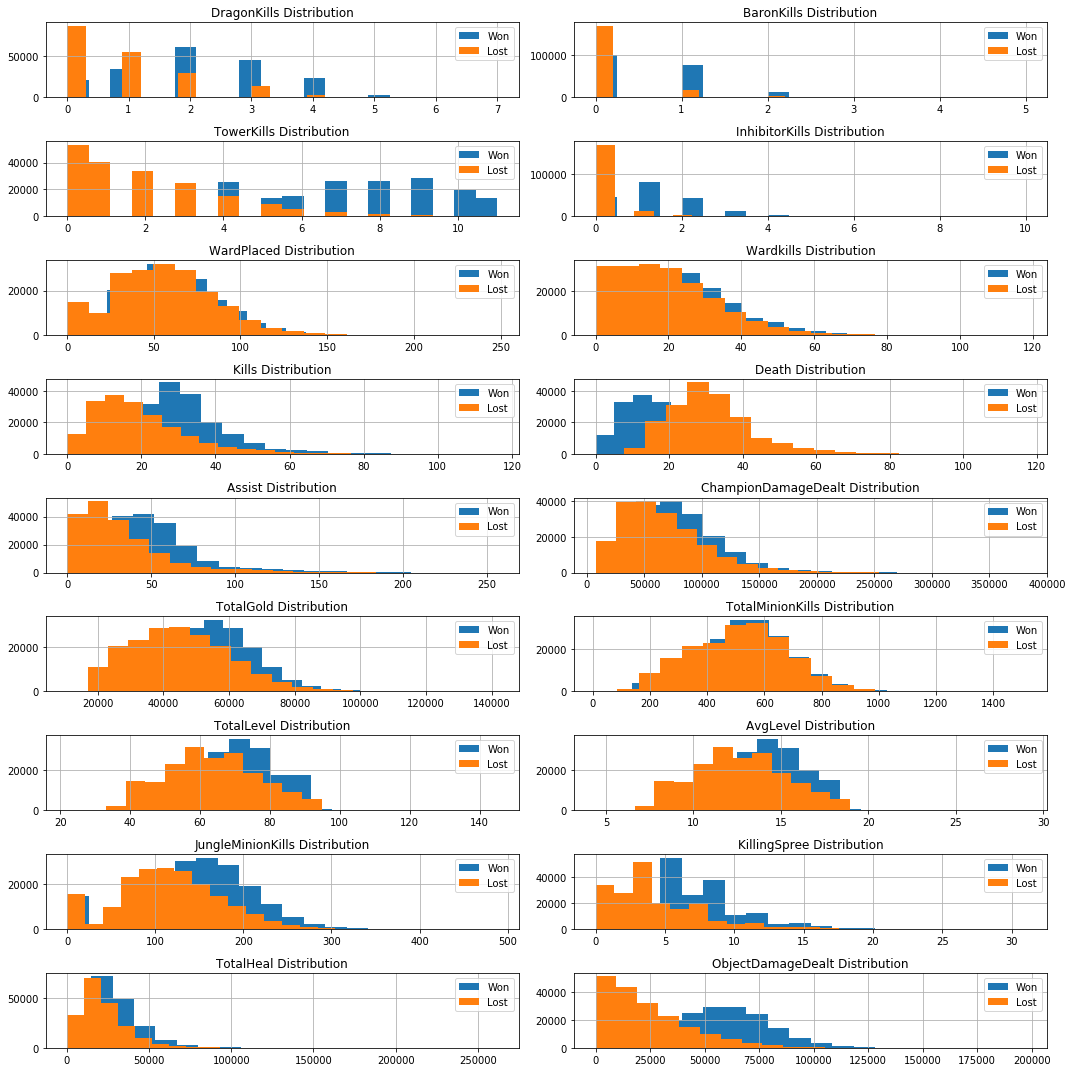

In [143]:
compare_histograms(df_win.iloc[:,6:], df_lose.iloc[:,6:], df_win.iloc[:,6:], 9, 2)

In [144]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,WardPlaced,Wardkills,Kills,Death,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
Wins,1,0.19212,0.448265,0.395068,0.270257,0.647807,0.479878,0.380835,0.729608,0.572109,0.0448272,0.0865484,0.435137,-0.433179,0.341611,0.172546,0.284648,0.0875244,0.237316,0.237316,0.236371,0.403689,0.220408,0.555647
FirstBlood,0.19212,1,0.202315,0.0557121,0.132986,0.136663,0.135857,0.0476359,0.176404,0.114422,0.0113143,0.0206791,0.133019,-0.132459,0.0835342,0.0422629,0.0791501,0.0323608,0.0519858,0.0519858,0.0571443,0.122577,0.0346878,0.141214
FirstTower,0.448265,0.202315,1,0.135345,0.189256,0.352521,0.272185,0.111111,0.455794,0.294901,0.0228991,0.0568906,0.247818,-0.245172,0.149657,0.0956917,0.170623,0.0671217,0.118863,0.118863,0.164259,0.240434,0.079553,0.356045
FirstBaron,0.395068,0.0557121,0.135345,1,0.136272,0.429214,0.439698,0.879384,0.541958,0.410739,0.399541,0.394299,0.288151,-0.0748693,0.214471,0.286514,0.418582,0.401228,0.389791,0.389791,0.482917,0.253031,0.366424,0.65541
FirstDragon,0.270257,0.132986,0.189256,0.136272,1,0.158109,0.587473,0.126054,0.2709,0.107932,0.17349,0.140001,0.0298751,-0.26395,-0.0812554,-0.0443271,0.0296047,0.179624,-0.0226059,-0.0226059,0.272698,0.0159784,0.0623539,0.340891
FirstInhibitor,0.647807,0.136663,0.352521,0.429214,0.158109,1,0.40541,0.404266,0.778271,0.784778,0.121789,0.155213,0.469606,-0.15907,0.402498,0.324822,0.415739,0.16041,0.37245,0.37245,0.273736,0.429472,0.308889,0.565815
DragonKills,0.479878,0.135857,0.272185,0.439698,0.587473,0.40541,1,0.476283,0.616513,0.385599,0.52248,0.501241,0.288084,-0.213239,0.13835,0.273789,0.416783,0.543488,0.34222,0.34222,0.66802,0.244244,0.416897,0.795993
BaronKills,0.380835,0.0476359,0.111111,0.879384,0.126054,0.404266,0.476283,1,0.556563,0.456153,0.484637,0.473846,0.325308,-0.00819196,0.258063,0.3809,0.511335,0.487026,0.468771,0.468771,0.554183,0.28656,0.462384,0.725919
TowerKills,0.729608,0.176404,0.455794,0.541958,0.2709,0.778271,0.616513,0.556563,1,0.772334,0.368478,0.365291,0.519497,-0.198039,0.3536,0.403526,0.566303,0.436855,0.474002,0.474002,0.549707,0.458755,0.443039,0.827235
InhibitorKills,0.572109,0.114422,0.294901,0.410739,0.107932,0.784778,0.385599,0.456153,0.772334,1,0.132386,0.156248,0.548143,0.00996626,0.475568,0.468523,0.537569,0.195465,0.480732,0.480732,0.27296,0.502378,0.399418,0.573924


In [145]:
#A relação das medias e matriz de correlação confirmam que os maiores focos são os objetivos.
#Death é o único com correlação negativa.
#TowerKills e InhibitorKills são relacionados, mas FirstTower e FirstInhibitor não.
#TotalGold e Assist tem alta correlação com Kills, Kills são a maior fonte de ouro.
#TotalGold tem correlação muito baixa com win.
#Assist tem alta correlação com Level e KillingSpree(maior números de morte em sequência).

### 5) Modelagem 30%

Agora você terá mais uma oportunidade de mostrar o que você aprendeu durante o módulo 2 quanto a modelagem de dados e criação de modelos. Utilizando os dados preparados na seção 1 e após a análise feita na seção 2 você deverá:
1. **Defina um problema de regressão ou classificação que envolva uma variável dos seus dados.**

Com base nas variáveis presentes gostaria de propor um modelo que indicara qual time vai obter a vitória.

2. **Realize ao menos 2 técnicas de processamento e seleção de features.**
    * Isto inclui, normalização, PCA, e técnicas de seleção de features como information gain. Seja criativo pois está parte é crucial para seu modelo. Você pode escolhar manualmente as features desde que seja justificada na seção 2 (parte de Análise).


In [146]:
df_objetivo = df["Wins"]
df_features = df.drop(["Wins"], axis = 1)

In [147]:
df_objetivo

0         1
1         1
2         1
3         0
4         1
         ..
377031    1
377032    1
377033    1
377034    1
377035    0
Name: Wins, Length: 377036, dtype: int64

In [148]:
df_features

,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,WardPlaced,...,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,0,0,1,1,1,2,1,7,1,50,...,45,67290,49014,481,70,14.0,129,6,27440,51473
1,1,1,1,0,1,2,2,9,1,98,...,54,122689,73057,687,86,17.2,231,12,43476,82289
2,1,1,0,0,0,1,0,5,0,44,...,14,41757,37613,519,58,11.6,118,5,18453,34399
3,0,1,0,0,0,1,0,3,0,70,...,34,63149,49753,603,65,13.0,187,4,23766,49898
4,1,1,0,0,0,0,0,4,1,0,...,95,108220,63415,250,87,17.4,0,12,46176,9622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377031,1,1,0,0,1,2,0,11,3,77,...,89,121022,67989,692,78,15.6,193,12,27313,60322
377032,1,1,0,1,0,1,0,2,0,30,...,25,34633,32363,389,50,10.0,94,3,16164,22610
377033,1,1,0,1,1,2,0,10,1,41,...,23,30516,37148,432,53,10.6,115,2,8497,42128
377034,1,1,1,1,1,3,1,11,3,58,...,58,98734,56487,564,69,13.8,158,9,21685,72801


In [149]:
from sklearn import preprocessing
def normalize_data(df):
  df = df+1
  scaler = preprocessing.PowerTransformer(method="box-cox", standardize=True).fit(df)
  norm_df = pd.DataFrame(scaler.transform(df),columns=df.columns)
  return norm_df

In [150]:
normalizado = normalize_data(df_features)
normalizado.head()

,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,WardPlaced,...,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,AvgLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,-1.0,-0.999258,1.673206,1.085056,1.281041,0.534239,1.544548,0.820347,0.930552,-0.138435,...,0.353755,0.057166,0.038557,-0.259201,0.282924,0.282508,0.022098,0.193019,0.356665,0.612241
1,1.0,1.000743,1.673206,-0.921611,1.281041,0.534239,1.684050,1.235525,0.930552,1.350302,...,0.635112,1.314112,1.491580,1.011851,1.498202,1.498866,1.488388,1.550837,1.199770,1.417750
2,1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,0.341491,-0.842797,-0.341213,...,-1.100508,-0.821998,-0.755365,-0.023746,-0.645890,-0.646285,-0.144766,-0.091955,-0.323253,0.051052
3,-1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,-0.238945,-0.842797,0.506204,...,-0.047973,-0.065644,0.087179,0.495067,-0.102072,-0.102586,0.871045,-0.405245,0.105472,0.565011
4,1.0,1.000743,-0.597655,-0.921611,-0.780615,-1.334294,-0.638917,0.067738,0.930552,-2.178459,...,1.617295,1.036611,0.937400,-1.703842,1.573395,1.574157,-2.245501,1.550837,1.314693,-1.152728


In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [152]:
vif = calc_vif(normalizado)
vif.sort_values(ascending=False,by="VIF")

,variables,VIF
18,AvgLevel,3.943680e+06
17,TotalLevel,3.941698e+06
15,TotalGold,5.530927e+01
11,Kills,1.832668e+01
14,ChampionDamageDealt,1.719808e+01
22,ObjectDamageDealt,1.269715e+01
16,TotalMinionKills,1.261480e+01
6,BaronKills,1.052180e+01
7,TowerKills,9.836845e+00
13,Assist,9.672501e+00


In [153]:
normalizado = normalizado.drop(["AvgLevel","TotalLevel"], axis = 1)
normalizado

,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,WardPlaced,...,Kills,Death,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,-1.0,-0.999258,1.673206,1.085056,1.281041,0.534239,1.544548,0.820347,0.930552,-0.138435,...,0.668187,-0.465950,0.353755,0.057166,0.038557,-0.259201,0.022098,0.193019,0.356665,0.612241
1,1.0,1.000743,1.673206,-0.921611,1.281041,0.534239,1.684050,1.235525,0.930552,1.350302,...,1.332503,1.096246,0.635112,1.314112,1.491580,1.011851,1.488388,1.550837,1.199770,1.417750
2,1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,0.341491,-0.842797,-0.341213,...,-0.642011,-1.665047,-1.100508,-0.821998,-0.755365,-0.023746,-0.144766,-0.091955,-0.323253,0.051052
3,-1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,-0.238945,-0.842797,0.506204,...,-0.459565,0.596889,-0.047973,-0.065644,0.087179,0.495067,0.871045,-0.405245,0.105472,0.565011
4,1.0,1.000743,-0.597655,-0.921611,-0.780615,-1.334294,-0.638917,0.067738,0.930552,-2.178459,...,1.275939,0.853746,1.617295,1.036611,0.937400,-1.703842,-2.245501,1.550837,1.314693,-1.152728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377031,1.0,1.000743,-0.597655,-0.921611,1.281041,0.534239,-0.638917,1.606125,1.608601,0.722695,...,1.332503,0.462246,1.494768,1.283460,1.204401,1.042554,0.956406,1.550837,0.348470,0.864609
377032,1.0,1.000743,-0.597655,1.085056,-0.780615,-0.221763,-0.638917,-0.592665,-0.842797,-0.837795,...,-0.286998,-1.810515,-0.448545,-1.140579,-1.154739,-0.831506,-0.517301,-0.756360,-0.541007,-0.428830
377033,1.0,1.000743,-0.597655,1.085056,1.281041,0.534239,-0.638917,1.425574,0.930552,-0.444624,...,-0.459565,-1.967492,-0.550348,-1.348288,-0.789751,-0.563592,-0.190668,-1.161532,-1.536733,0.319743
377034,1.0,1.000743,1.673206,1.085056,1.281041,1.124039,1.544548,1.606125,1.608601,0.124629,...,1.102053,-0.128835,0.749913,0.838874,0.517055,0.254460,0.452405,0.930477,-0.051748,1.189663


In [154]:
df_treino = normalizado
df_treino

,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills,WardPlaced,...,Kills,Death,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,-1.0,-0.999258,1.673206,1.085056,1.281041,0.534239,1.544548,0.820347,0.930552,-0.138435,...,0.668187,-0.465950,0.353755,0.057166,0.038557,-0.259201,0.022098,0.193019,0.356665,0.612241
1,1.0,1.000743,1.673206,-0.921611,1.281041,0.534239,1.684050,1.235525,0.930552,1.350302,...,1.332503,1.096246,0.635112,1.314112,1.491580,1.011851,1.488388,1.550837,1.199770,1.417750
2,1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,0.341491,-0.842797,-0.341213,...,-0.642011,-1.665047,-1.100508,-0.821998,-0.755365,-0.023746,-0.144766,-0.091955,-0.323253,0.051052
3,-1.0,1.000743,-0.597655,-0.921611,-0.780615,-0.221763,-0.638917,-0.238945,-0.842797,0.506204,...,-0.459565,0.596889,-0.047973,-0.065644,0.087179,0.495067,0.871045,-0.405245,0.105472,0.565011
4,1.0,1.000743,-0.597655,-0.921611,-0.780615,-1.334294,-0.638917,0.067738,0.930552,-2.178459,...,1.275939,0.853746,1.617295,1.036611,0.937400,-1.703842,-2.245501,1.550837,1.314693,-1.152728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377031,1.0,1.000743,-0.597655,-0.921611,1.281041,0.534239,-0.638917,1.606125,1.608601,0.722695,...,1.332503,0.462246,1.494768,1.283460,1.204401,1.042554,0.956406,1.550837,0.348470,0.864609
377032,1.0,1.000743,-0.597655,1.085056,-0.780615,-0.221763,-0.638917,-0.592665,-0.842797,-0.837795,...,-0.286998,-1.810515,-0.448545,-1.140579,-1.154739,-0.831506,-0.517301,-0.756360,-0.541007,-0.428830
377033,1.0,1.000743,-0.597655,1.085056,1.281041,0.534239,-0.638917,1.425574,0.930552,-0.444624,...,-0.459565,-1.967492,-0.550348,-1.348288,-0.789751,-0.563592,-0.190668,-1.161532,-1.536733,0.319743
377034,1.0,1.000743,1.673206,1.085056,1.281041,1.124039,1.544548,1.606125,1.608601,0.124629,...,1.102053,-0.128835,0.749913,0.838874,0.517055,0.254460,0.452405,0.930477,-0.051748,1.189663


3. **Defina uma métrica para avaliar o seu modelo.**
    * Por exemplo, você pode utilizar MAE (Mean Absolute Error) para um problema de regressão. Ou, F1-Score para um problema de classificação. Há varias métricas, então escolha sabiamente.


R2 score e cross validation score, os mais adequados para os modelos utilizados

4. **Divida seus dados em 2 conjuntos. Um de treino e outro conjunto de teste.**
    * Treine e otimize seu modelo no conjunto de treino e apenas use o conjunto de teste para apresentar os resultados finais.


In [155]:
X_train, X_test, y_train, y_test = train_test_split(df_treino, df_objetivo, test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(301628, 21) (301628,)
(75408, 21) (75408,)


5. **Treine um ou mais modelos de ML para o seu problema.**
    * Escolha 1 ou mais tipos de classificadores ou regressores dependendo do seu problema.
    * Por exemplo, TreeClassifier para um problema de classificação. 
    * Use cross-validation e outras técnicas como GridSearch e ou RandomizedSearch para encontrar os melhores parametros para o seu modelo.


In [156]:
modelo = sm.Logit(df_objetivo,df_treino).fit()
predict = modelo.predict(df_treino)
print_modelo = modelo.summary(xname=list(df_treino.columns))
print(print_modelo)

Optimization terminated successfully.
         Current function value: 0.086387
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                   Wins   No. Observations:               377036
Model:                          Logit   Df Residuals:                   377015
Method:                           MLE   Df Model:                           20
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.8754
Time:                        20:50:17   Log-Likelihood:                -32571.
converged:                       True   LL-Null:                   -2.6134e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
FirstBlood             -0.2326      0.011    -21.944      0.000      -0.253      -0.212
F

In [157]:
model = tree.DecisionTreeClassifier(criterion='gini',random_state=0)
model.fit(X_train, y_train)
model.score(X_train, y_train)

1.0

In [158]:
predicted= model.predict(X_test)
print('Score:',sklearn.metrics.r2_score(y_test,predicted))

Score: 0.883830139944


In [159]:
cross = cross_val_score(model, df_treino, df_objetivo, cv=10,n_jobs=-1).mean()
print(cross)

0.972302377434


6. **Apresente (com visualizações) os resultados do seu modelo mostrando que ele é melhor do que um baseline não aleatório.**
    * Para o baseline, você pode escolher um modelo bem trivial mas não aleatório. Por exemplo, para um problema de classificação um baseline pode ser a classe mais presente caso o conjunto de dados seja desbalanceado.  Um modelo mais simples também pode ser utilizado como baseline, por exemplo, você escolheu um Random Forest Classifier, e comparou os resultados um Logistic Regression. Você pode até mesmo escolher um modelo de AutoML(como TPOT) como Baseline.

In [160]:
#Como base line foi utilizado um modelo de regressão logística que apresentou um R2 de ~0,8754
print(print_modelo)

                           Logit Regression Results                           
Dep. Variable:                   Wins   No. Observations:               377036
Model:                          Logit   Df Residuals:                   377015
Method:                           MLE   Df Model:                           20
Date:                Sat, 01 Aug 2020   Pseudo R-squ.:                  0.8754
Time:                        20:50:17   Log-Likelihood:                -32571.
converged:                       True   LL-Null:                   -2.6134e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
FirstBlood             -0.2326      0.011    -21.944      0.000      -0.253      -0.212
FirstTower             -0.2025      0.011    -18.263      0.000      -0.224      -0.181
FirstBaron      

In [161]:
#Apos foi utilizado um modelo de arvore de decisão para comparação, com um R2 de ~0,8838
print('Score:',sklearn.metrics.r2_score(y_test,predicted))

Score: 0.883830139944


In [162]:
#E por final foi utilizado o modelo de arvore de decisão com cross validation de 10, que obteve uma
#acurácia de ~97,23%
print(cross)

0.972302377434


### 6) Conclusões **10%**

A quantidade de abates do time é o maior garantidor de vitorias?
Não, o maior garantidor de vitorias é destruir inibidores, principalmente o primeiro na correlação
das medias e o mais importante na matriz de correlação é a destruição das torres. Os principais focos devem ser os objetivos.

As mortes do time são o maior causador de derrotas?
Dentre as features analisadas foi a única que demonstrou ser um indicador de derrota, por tanto sim.

Qual a influência dos objetivos (Dragon, Baron, Inhibitor e Turret) na taxa de vitória? Seriam eles
mais importantes que abates e mortes?
Sim eles demonstraram ser mais importantes e presentes nas vitorias do que um time que obtém muitos
abates, matar 2 dragões ou mais, 4 torres ou mais, são excelentes indicadores de vitória, mas um
time com muitas assistências, 30 ou mais, e/ou com mais de 20 abates também é um excelente indicador.

O que é mais importante como foco? Objetivos ou ouro?
Os objetivos demonstraram muito mais importância para a vitória que o ouro.

Quais devem ser os maiores focos do jogar durante o jogo?
Focar os objetivos em geral, evitar mortes, ter mais abates que mortes, e fazer os abates em 
conjunto, aumentando o número de assistências.